<a href="https://colab.research.google.com/github/w41k3r77020-code/Contract_Risk_Analysis/blob/main/CONTRACT_RISK_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/ML_Group_Project/dataset/legal_contract_clauses.csv"

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/ML_Group_Project/dataset/legal_contract_clauses.csv"
df = pd.read_csv(path)

df.head()

,clause_text,clause_type,risk_level
0,Electric City of Illinois L.L.C.,Parties,low
1,The term of this Agreement shall be ten (10)...,Effective Date,low
2,Unless earlier terminated otherwise prov...,Effective Date,high
3,If Distributor comp...,Renewal Term,low
4,This Agreement is to be construed according to...,Governing Law,low


In [ ]:
df.head()

,clause_text,clause_type,risk_level
0,Electric City of Illinois L.L.C.,Parties,low
1,The term of this Agreement shall be ten (10)...,Effective Date,low
2,Unless earlier terminated otherwise prov...,Effective Date,high
3,If Distributor comp...,Renewal Term,low
4,This Agreement is to be construed according to...,Governing Law,low


In [ ]:
df.shape

(9447, 3)

In [ ]:
df.head()

,clause_text,clause_type,risk_level
0,Electric City of Illinois L.L.C.,Parties,low
1,The term of this Agreement shall be ten (10)...,Effective Date,low
2,Unless earlier terminated otherwise prov...,Effective Date,high
3,If Distributor comp...,Renewal Term,low
4,This Agreement is to be construed according to...,Governing Law,low


NORMALIZATION

In [ ]:
import string

def normalize_text(text):
    text_lower = text.lower() # Convert all text to lowercase
    translator = str.maketrans('', '', string.punctuation) # Creates mapping to remove punctuation.
    return text_lower.translate(translator) # Apply punctuation removal.

df['clean_text'] = df['clause_text'].apply(normalize_text) # Apply normalization to every clause

In [ ]:
df.head()

,clause_text,clause_type,risk_level,clean_text
0,Electric City of Illinois L.L.C.,Parties,low,electric city of illinois llc
1,The term of this Agreement shall be ten (10)...,Effective Date,low,the term of this agreement shall be ten 10 ...
2,Unless earlier terminated otherwise prov...,Effective Date,high,unless earlier terminated otherwise prov...
3,If Distributor comp...,Renewal Term,low,if distributor comp...
4,This Agreement is to be construed according to...,Governing Law,low,this agreement is to be construed according to...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

TOKENIZATION


In [ ]:
df['tokens'] = df['clean_text'].apply(word_tokenize) #Split each sentence into list of words

In [ ]:
 df[['clean_text', 'tokens']].head() # Verify tokenization output

,clean_text,tokens
0,electric city of illinois llc,"[electric, city, of, illinois, llc]"
1,the term of this agreement shall be ten 10 ...,"[the, term, of, this, agreement, shall, be, te..."
2,unless earlier terminated otherwise prov...,"[unless, earlier, terminated, otherwise, provi..."
3,if distributor comp...,"[if, distributor, complies, with, all, of, the..."
4,this agreement is to be construed according to...,"[this, agreement, is, to, be, construed, accor..."


STOPWORDS REMOVAL

In [ ]:
stop_words = set(stopwords.words('english')) # Loading standard  English stopwords list.

legal_keep = {"shall", "not", "may", "must"} #keeping them as they carry meaning.
stop_words = stop_words - legal_keep # Remove legal words from stopwords list.


In [ ]:
df['tokens'] = df['tokens'].apply(
    lambda words: [word for word in words if word not in stop_words] # Filter out stopwords
)

In [ ]:
df["tokens"].head()

,tokens
0,"[electric, city, illinois, llc]"
1,"[term, agreement, shall, ten, 10, years, term,..."
2,"[unless, earlier, terminated, otherwise, provi..."
3,"[distributor, complies, terms, agreement, agre..."
4,"[agreement, construed, according, laws, state,..."


LEMMATIZATION

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
df['tokens'] = df['tokens'].apply(
    lambda words: [lemmatizer.lemmatize(word) for word in words] # Reduce each word to base form.
)

In [ ]:
df["tokens"].head()

,tokens
0,"[electric, city, illinois, llc]"
1,"[term, agreement, shall, ten, 10, year, term, ..."
2,"[unless, earlier, terminated, otherwise, provi..."
3,"[distributor, complies, term, agreement, agree..."
4,"[agreement, construed, according, law, state, ..."


In [ ]:
df['final_text'] = df['tokens'].apply(lambda words: " ".join(words)) # Join tokens back into  string for TF-IDF

In [ ]:
df[['clause_text', 'final_text']].head() # Verify final clean text

,clause_text,final_text
0,Electric City of Illinois L.L.C.,electric city illinois llc
1,The term of this Agreement shall be ten (10)...,term agreement shall ten 10 year term shall co...
2,Unless earlier terminated otherwise prov...,unless earlier terminated otherwise provided t...
3,If Distributor comp...,distributor complies term agreement agreement ...
4,This Agreement is to be construed according to...,agreement construed according law state illinois


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000, # Keep only top 5000 important words.

    ngram_range=(1,2), # Use single words and 2-word phrases.

    min_df=2 # Ignore words appearing in less than 2 documents.
)

X = vectorizer.fit_transform(df['final_text']) # Convert cleaned text into numerical TF-IDF matrix.

In [ ]:
print(X.shape) # rows=clauses, cols=features

(9447, 5000)


LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['risk_encoded'] = le.fit_transform(df['risk_level']) # Convert risk level text to numbers

y = df['risk_encoded'] # y is the target variable model will predict

In [ ]:
print(le.classes_) # Show label mapping: high=0, low=1, medium=2

['high' 'low' 'medium']


TRAIN/TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # 80% data for training, 20% for testing
    random_state=42, # Ensures same split every time
    stratify=y #maintain equal class distribution in training and testing
)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lr = lr.predict(X_test) # Predict on test data

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8671957671957672

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       849
           1       0.92      0.78      0.84       372
           2       0.82      0.90      0.86       669

    accuracy                           0.87      1890
   macro avg       0.88      0.85      0.86      1890
weighted avg       0.87      0.87      0.87      1890



DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=20, random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.825925925925926

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       849
           1       0.88      0.66      0.75       372
           2       0.71      0.94      0.81       669

    accuracy                           0.83      1890
   macro avg       0.85      0.80      0.81      1890
weighted avg       0.85      0.83      0.83      1890



CONFUSION MATRIX

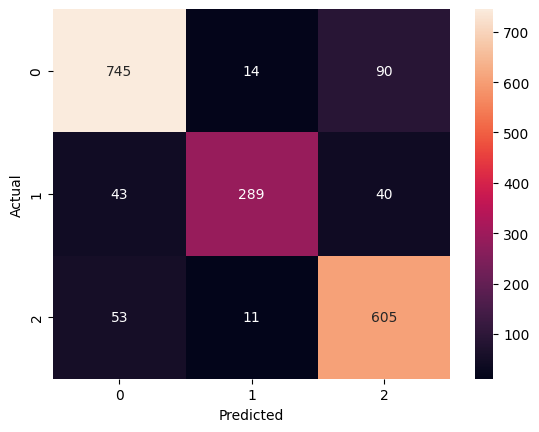

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#we will go ahead with logistic one as the accuracy is 86% so lets train our mdoel on full data as earlier we test it on 80% of data
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(max_iter=1000)

final_model.fit(X, y)

LogisticRegression(max_iter=1000)

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, "risk_model.pkl")

['risk_model.pkl']

In [ ]:
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [ ]:
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
cleaned_text = "party shall indemnify company damage"
vector = vectorizer.transform([cleaned_text])

prediction = final_model.predict(vector)

risk_label = le.inverse_transform(prediction)

print("Predicted Risk:", risk_label[0])

Predicted Risk: high


In [ ]:
from google.colab import files

files.download("risk_model.pkl")
files.download("tfidf_vectorizer.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>